# K-Nearest Neighbors
K-Nearest Neighbors (KNN) is a common **supervised** learning algorithm for classification and regression.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy
from scipy import spatial

Generate some 2D data, split into train and test

In [2]:
def f(x1, x2, x0=0):
    return np.square(x1+x2) + x0

In [3]:
N_SAMPLES = 100
N_SAMPLES_TEST = int(N_SAMPLES / 2)

In [4]:
x = np.random.random_integers(0, N_SAMPLES, 200).reshape(N_SAMPLES, -1)
x.shape

/home/jains/Documents/buildtf/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 100 + 1) instead
  """Entry point for launching an IPython kernel.


(100, 2)

In [5]:
x0 = x[:, 0]
x1 = x[:, 1]
x0

array([ 3,  4, 25, 20, 47, 59, 12, 43, 14, 32, 68, 15, 72, 49, 93, 64, 91,
       27, 50, 51, 84, 35, 78, 54, 89, 67, 91, 59, 63, 87, 47, 83, 38, 53,
        1, 23, 98, 59, 65,  9, 67, 12, 75, 71, 61, 68, 51, 93, 44, 64, 82,
        2, 23,  1, 42, 51, 56, 61, 52, 71, 66, 65,  3, 89, 65, 76, 56, 65,
       32, 84, 61, 97, 70, 66, 46, 67, 18, 19, 65, 27, 75, 95, 87, 97, 19,
       10, 23, 74, 28, 34, 37, 22, 84, 34, 60, 88, 82, 29, 89, 80])

In [6]:
y = f(x0, x1)
y

array([  961,  5476,  2401,  7744,  2304, 20736, 10201, 14400,  1764,
        4624, 22801, 12100, 12321,  4096, 32041,  6241, 11449, 12100,
        7569,  7396, 24649,  9604, 24964, 15876,  9604, 12769, 12769,
        7744, 19044, 19881, 20164, 16129, 15129, 23409,  2809,  7569,
       15129, 19044, 13924,   225,  8836,  5329,  5776,  5041, 16900,
       27556, 13924, 12544,  7744, 22500, 19600,   729, 10201,  2304,
        6400, 15625, 18496,  4624,  9801,  9216,  7396,  7921,    81,
       19044, 25600, 25921, 17956, 16900, 13689, 18769, 11664, 11664,
       21316, 14641,  6724, 24649,  3481,  3600,  7396,  1600, 12100,
       13456, 18496, 20449,   625,  7396,  5184, 25600,  7396, 17956,
       10000,   961,  9216, 10201, 11236, 16129, 28900,  8836, 13924,
       11881])

In [7]:
x_train = x[:N_SAMPLES_TEST]
y_train = y[:N_SAMPLES_TEST]
x_train, y_train

(array([[  3,  28],
        [  4,  70],
        [ 25,  24],
        [ 20,  68],
        [ 47,   1],
        [ 59,  85],
        [ 12,  89],
        [ 43,  77],
        [ 14,  28],
        [ 32,  36],
        [ 68,  83],
        [ 15,  95],
        [ 72,  39],
        [ 49,  15],
        [ 93,  86],
        [ 64,  15],
        [ 91,  16],
        [ 27,  83],
        [ 50,  37],
        [ 51,  35],
        [ 84,  73],
        [ 35,  63],
        [ 78,  80],
        [ 54,  72],
        [ 89,   9],
        [ 67,  46],
        [ 91,  22],
        [ 59,  29],
        [ 63,  75],
        [ 87,  54],
        [ 47,  95],
        [ 83,  44],
        [ 38,  85],
        [ 53, 100],
        [  1,  52],
        [ 23,  64],
        [ 98,  25],
        [ 59,  79],
        [ 65,  53],
        [  9,   6],
        [ 67,  27],
        [ 12,  61],
        [ 75,   1],
        [ 71,   0],
        [ 61,  69],
        [ 68,  98],
        [ 51,  67],
        [ 93,  19],
        [ 44,  44],
        [ 64,  86]])

In [8]:
x_test = x[N_SAMPLES_TEST:]
y_test = y[N_SAMPLES_TEST:]
x_test, y_test

(array([[ 82,  58],
        [  2,  25],
        [ 23,  78],
        [  1,  47],
        [ 42,  38],
        [ 51,  74],
        [ 56,  80],
        [ 61,   7],
        [ 52,  47],
        [ 71,  25],
        [ 66,  20],
        [ 65,  24],
        [  3,   6],
        [ 89,  49],
        [ 65,  95],
        [ 76,  85],
        [ 56,  78],
        [ 65,  65],
        [ 32,  85],
        [ 84,  53],
        [ 61,  47],
        [ 97,  11],
        [ 70,  76],
        [ 66,  55],
        [ 46,  36],
        [ 67,  90],
        [ 18,  41],
        [ 19,  41],
        [ 65,  21],
        [ 27,  13],
        [ 75,  35],
        [ 95,  21],
        [ 87,  49],
        [ 97,  46],
        [ 19,   6],
        [ 10,  76],
        [ 23,  49],
        [ 74,  86],
        [ 28,  58],
        [ 34, 100],
        [ 37,  63],
        [ 22,   9],
        [ 84,  12],
        [ 34,  67],
        [ 60,  46],
        [ 88,  39],
        [ 82,  88],
        [ 29,  65],
        [ 89,  29],
        [ 80,  29]])

Visualize train and test data

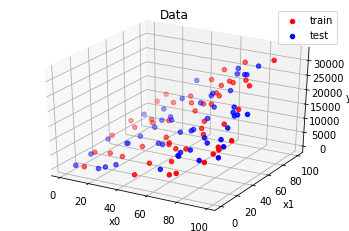

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train[:, 0], x_train[:, 1], y_train, c='r', label='train')
ax.scatter(x_test[:, 0], x_test[:, 1], y_test, c='b', label='test')
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('y')
ax.set_title('Data')
ax.legend()

Training step: just populate data into the 2D space

In [10]:
pass

Test step: for each test point, find the K-nearest neighbors.

In [11]:
def find_k_nearest_neighbors(x_train, point, k=2):
    # Returns indexes into x_train of the k training samples closest to `point` by L2 (euclidean) distance
    dists = np.array([scipy.spatial.distance.euclidean(pt, point) for pt in x_train])
    sorted_idxes = np.argsort(dists)
    return sorted_idxes[:k], dists[sorted_idxes[:k]]

idxes_of_nearest_and_dists = [find_k_nearest_neighbors(x_train, point) for point in x_test]

With these nearest neighbors, compute the weighted by distance mean $\mu$, and then use $\mu$ to perform either regression or classification (via thresholding).

In [12]:
mu = np.array([
    np.average(y_test[idxes], weights=np.nan_to_num(np.divide(1, dists)))
    for idxes, dists in idxes_of_nearest_and_dists
])
mu

array([ 5314.28198539, 17604.89520132, 11351.24910851,   698.66969044,
       13820.69216572, 19488.6080405 , 22092.50366988, 19448.31959947,
       13816.86968851, 14268.97255325, 19037.92294799,  7978.63257591,
       18308.28571429,  6438.53796601, 14773.70577244, 15816.81240556,
       21947.        ,  9865.92957827, 17654.90545616,  4668.66907017,
       16754.68925636, 12492.48442469,  7396.        , 10812.64446734,
       15960.20932127, 10023.25217276,  9521.49357073,  9508.5       ,
       18115.63356942, 13044.34038095,  3121.08129133,  6657.16724513,
        6798.57529969,  7234.13677653, 15279.43155663,  1356.68238164,
        8282.03602452, 14104.53816256,  9427.01254572, 15124.72730476,
       11131.68668765, 14343.24791449, 11438.0476078 , 10530.50089276,
       16908.42300696,  9663.32904797, 23220.        ,  9488.41278348,
        4204.80468952,  1765.72930683])

Compute mean square error

In [13]:
assert mu.shape == y_test.shape
mse = np.divide(np.sum(np.square(mu-y_test)), len(mu))
mse

82937180.18868673

In [44]:
def knn_for_k(k, x_test=x_test, y_test=y_test, x_train=x_train, y_train=y_train, classification=False):
    """
    :param k: an integer. The number of nearest neighbors to select.
    :param x_test: a np.ndarray. The first axis indexes samples. The second axis indexes features.
    :param y_test: a np.ndarray. The first axis indexes samples. The second axis indexes features.
    :param classification: Use as a classifier.
    :return: mse, mu. mse is the mean square error. mu is the inferred value for each point in x_test.
    if classification: returns an array of y labels and their distances for each point in x_test.
    """ 

    # Preprocess input data into np.ndarrays
    N_TRAIN_SAMPLES_INPUT, N_FEATURES_INPUT = x_train.shape
        
    if type(x_test) is not np.ndarray:
        x_test = np.array(x_test)
    if type(y_test) is not np.ndarray:
        y_test = np.array(y_test)

    # Preprocess input data into correct dimensions
    if len(x_test.shape) < 2:  # special case: only a single point in x_test.
        x_test = np.expand_dims(x_test, axis=0)
        assert x_test.shape == (1, N_FEATURES_INPUT)
    
    if y_test.shape == ():  # special case: only a single point in y_test -- 0-dimensional array.
        y_test = np.expand_dims(y_test, axis=0)
        # print('y_test.shape: {}'.format(y_test.shape))
        assert y_test.shape == (1,)
    
    # Compute nearest neighbors (in training set) for each point in x_test
    idxes_of_nearest_and_dists = [find_k_nearest_neighbors(x_train, point, k=k) for point in x_test]

    if classification:
        return np.array([
            (y_train[idxes], dists) for idxes, dists in idxes_of_nearest_and_dists
        ])

    # Compute the weighted average of the nearest neighbors. Weights are inverse distances.
    mu = np.array([
        np.average(y_train[idxes], weights=np.nan_to_num(np.divide(1, dists)))
        for idxes, dists in idxes_of_nearest_and_dists        
    ])
    assert mu.shape == y_test.shape
    
    # Compute the mean squared error (mse) as compared to the test GT data.
    mse = np.divide(np.sum(np.square(mu-y_test)), len(mu))

    return mse, mu

Plot relationship between k and MSE

Text(0.5, 1.0, 'mse vs k')

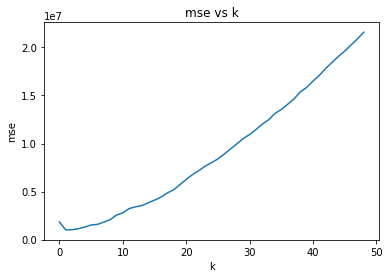

In [15]:
allresults = [knn_for_k(i) for i in range(1, 50)]
allmse = [result[0] for result in allresults]
plt.plot(allmse)
plt.xlabel('k')
plt.ylabel('mse')
plt.title('mse vs k')

Based on this graph, pick a k of 5.

In [16]:
k = 5

Visualize the inferred results

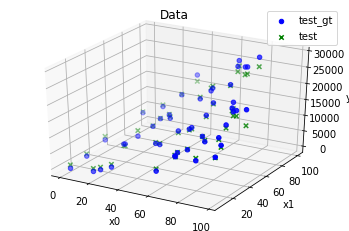

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.scatter(x_train[:, 0], x_train[:, 1], y_train, c='r', label='train')
ax.scatter(x_test[:, 0], x_test[:, 1], y_test, c='b', label='test_gt')
ax.scatter(x_test[:, 0], x_test[:, 1], allresults[k][1], c='g', marker='x', label='test')
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('y')
ax.set_title('Data')
ax.legend()

The results are reasonable for this type of problem!

For fun, let's deep dive into a particular example...

In [18]:
sample_idx = 45

In [19]:
print('expected: f({}) = {}'.format(x_test[sample_idx], y_test[sample_idx]))

expected: f([88 39]) = 16129


In [20]:
mse, mu = knn_for_k(k=k, x_test=x_test[sample_idx], y_test=y_test[sample_idx])
print('knn est: {}, mse: {}'.format(mu, mse))

knn est: [15504.96723284], mse: 389416.8944858216


# Application
The [Iris](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) dataset of flower types and features.
Unlike the toy problem, this is a classification problem.

In [21]:
from sklearn import datasets
from sklearn.decomposition import PCA
iris = datasets.load_iris()

In [22]:
x = iris['data']
y = iris['target']
x_features = iris['feature_names']
y_labels = iris['target_names']

In [23]:
x.shape, x

((150, 4), array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],


In [24]:
y.shape, y

((150,),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

In [25]:
x_features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [26]:
y_labels

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Visualize the data

In [27]:
print(x.shape)
print(x[:, 0].shape)
x[:, 0]

(150, 4)
(150,)


array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

Visualize the first 3 features only, with labels as colors

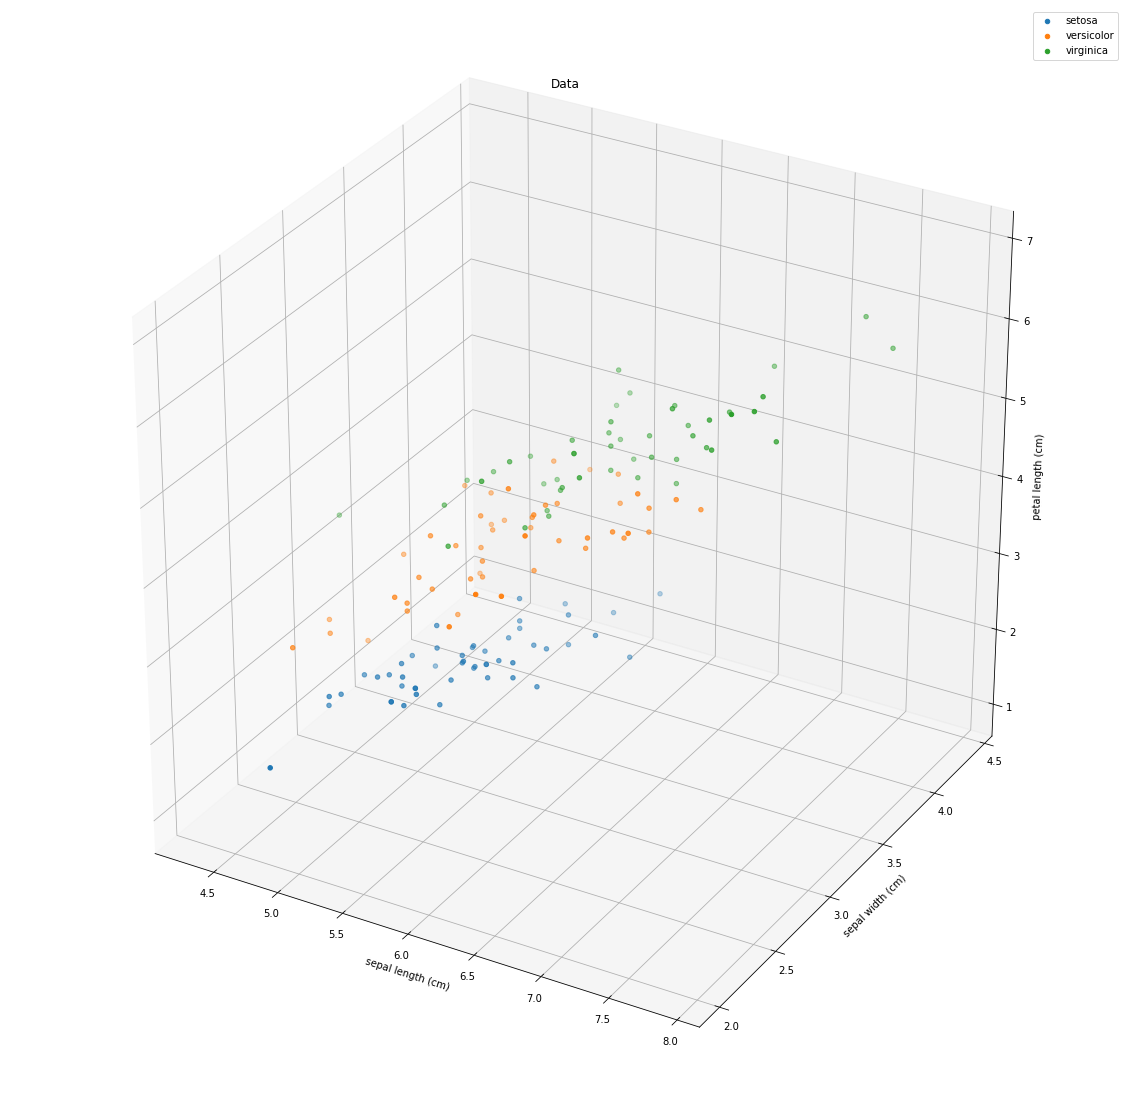

In [28]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
for label in np.unique(y):
    matches = y == label
    ax.scatter(x[:, 0][matches], x[:, 1][matches], x[:, 2][matches], c='C{}'.format(label), label=y_labels[label])
ax.set_xlabel(x_features[0])
ax.set_ylabel(x_features[1])
ax.set_zlabel(x_features[2])
ax.set_title('Data')
ax.legend(labels=y_labels)

Some division by petal length here.

Now visualize features 1-3 (of 0-3)

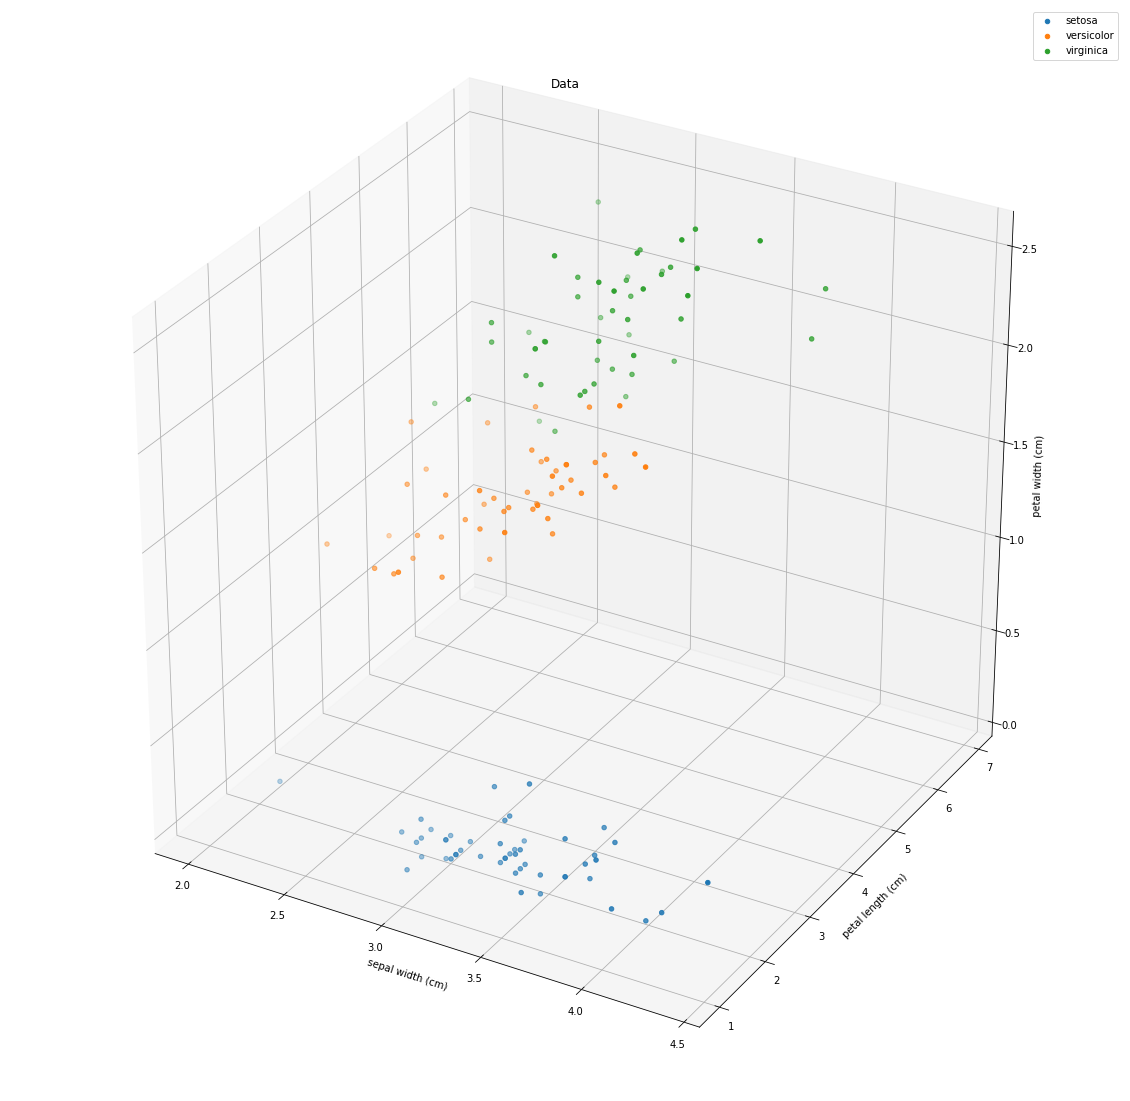

In [29]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
for label in np.unique(y):
    matches = y == label
    ax.scatter(x[:, 1][matches], x[:, 2][matches], x[:, 3][matches], c='C{}'.format(label), label=y_labels[label])
ax.set_xlabel(x_features[1])
ax.set_ylabel(x_features[2])
ax.set_zlabel(x_features[3])
ax.set_title('Data')
ax.legend(labels=y_labels)

Can clearly see a 'setosa' cluster by petal width. The other two classes are relatively separable here too.

Split data into train and test

In [30]:
import sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)
x_train

array([[4.9, 3.1, 1.5, 0.1],
       [7.3, 2.9, 6.3, 1.8],
       [5.5, 4.2, 1.4, 0.2],
       [4.3, 3. , 1.1, 0.1],
       [4.8, 3. , 1.4, 0.3],
       [6.7, 3.3, 5.7, 2.1],
       [4.4, 2.9, 1.4, 0.2],
       [5. , 3.3, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [7.1, 3. , 5.9, 2.1],
       [6.4, 3.2, 4.5, 1.5],
       [4.6, 3.4, 1.4, 0.3],
       [5.9, 3. , 5.1, 1.8],
       [6.3, 2.7, 4.9, 1.8],
       [5.1, 3.7, 1.5, 0.4],
       [5.8, 2.6, 4. , 1.2],
       [5. , 3.5, 1.6, 0.6],
       [5.7, 2.5, 5. , 2. ],
       [6.8, 3.2, 5.9, 2.3],
       [4.9, 2.5, 4.5, 1.7],
       [6.1, 2.6, 5.6, 1.4],
       [4.7, 3.2, 1.3, 0.2],
       [6.8, 2.8, 4.8, 1.4],
       [4.9, 2.4, 3.3, 1. ],
       [4.7, 3.2, 1.6, 0.2],
       [4.4, 3. , 1.3, 0.2],
       [4.6, 3.6, 1. , 0.2],
       [6.5, 3. , 5.5, 1.8],
       [5.4, 3.9, 1.3, 0.4],
       [6.6, 2.9, 4.6, 1.3],
       [6.7, 3. , 5. , 1.7],
       [6.7, 3.1, 4.4, 1.4],
       [6.9, 3.1, 5.4, 2.1],
       [5.4, 3

In [31]:
x_test

array([[5.5, 2.4, 3.8, 1.1],
       [5.7, 2.8, 4.1, 1.3],
       [6.7, 3. , 5.2, 2.3],
       [5. , 3. , 1.6, 0.2],
       [6. , 3.4, 4.5, 1.6],
       [5.6, 3. , 4.1, 1.3],
       [6.4, 3.2, 5.3, 2.3],
       [5.7, 3.8, 1.7, 0.3],
       [6.9, 3.2, 5.7, 2.3],
       [5.5, 3.5, 1.3, 0.2],
       [6.3, 2.8, 5.1, 1.5],
       [5. , 3.4, 1.5, 0.2],
       [5.5, 2.3, 4. , 1.3],
       [7.9, 3.8, 6.4, 2. ],
       [5. , 3.6, 1.4, 0.2],
       [5.7, 3. , 4.2, 1.2],
       [6.7, 3.1, 4.7, 1.5],
       [4.4, 3.2, 1.3, 0.2],
       [6.4, 2.7, 5.3, 1.9],
       [7.4, 2.8, 6.1, 1.9],
       [4.8, 3.4, 1.9, 0.2],
       [5.6, 2.5, 3.9, 1.1],
       [6.8, 3. , 5.5, 2.1],
       [6.1, 3. , 4.9, 1.8],
       [7.7, 2.6, 6.9, 2.3],
       [5.8, 2.8, 5.1, 2.4],
       [5.1, 3.8, 1.9, 0.4],
       [4.9, 3.6, 1.4, 0.1],
       [6.9, 3.1, 4.9, 1.5],
       [7.2, 3.2, 6. , 1.8],
       [5.8, 2.7, 5.1, 1.9],
       [6.3, 2.3, 4.4, 1.3],
       [4.6, 3.2, 1.4, 0.2],
       [6.2, 2.9, 4.3, 1.3],
       [5.3, 3

In [32]:
y_train, y_test

(array([0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2,
        0, 1, 1, 0, 0, 0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2,
        0, 1, 0, 0, 2, 0, 2, 2, 1, 1, 2, 1, 2, 0, 1, 0, 1, 0, 1, 1, 0, 1,
        0, 2, 1, 2, 2, 2, 0, 1, 1]),
 array([1, 1, 2, 0, 1, 1, 2, 0, 2, 0, 2, 0, 1, 2, 0, 1, 1, 0, 2, 2, 0, 1,
        2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 0, 1, 0, 1, 0, 2, 0, 1, 1, 1, 1, 2,
        2, 1, 2, 1, 0, 1, 2, 2, 1, 2, 2, 0, 2, 1, 1, 1, 2, 2, 2, 0, 2, 2,
        1, 0, 0, 2, 1, 1, 0, 0, 1]))

Use KNN to infer the classes.
Questions:
- What distance formulas to use
- Normalize the data dimensions?

Visualize the relationship between k and MSE.

Text(0.5, 1.0, 'mse vs k')

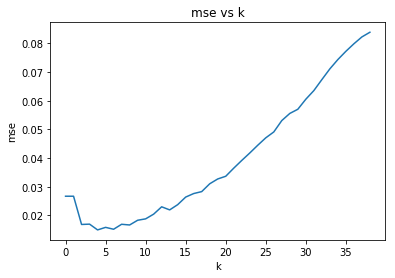

In [36]:
allresults = [knn_for_k(i, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test) for i in range(1, 40)]
allmse = [result[0] for result in allresults]
plt.plot(allmse)
plt.xlabel('k')
plt.ylabel('mse')
plt.title('mse vs k')

Select the optimum k value

In [39]:
k = np.argmin(allmse) + 1  # + 1 because the first k value is actually k = 1
k

5

In [54]:
y_labels_dists = knn_for_k(k, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test, classification=True)
results = []
for y_labels, dists in y_labels_dists:
    unique_labels = np.unique(y_labels)
    if len(unique_labels) == 1:
        results.append(unique_labels[0])
    else:
        results.append(scipy.stats.mode(y_labels).mode[0])

In [59]:
np.count_nonzero(results != y_test) / len(results)

0.013333333333333334

These are good baseline results -- approx 1.33% error on 75 test points! This is similar to what was achieved using MLPs [here](http://lab.fs.uni-lj.si/lasin/wp/IMIT_files/neural/doc/seminar8.pdf).

In [61]:
print(len(x_test), len(x_train))

75 75
